In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
## Clustering around KM per liter VS Horsepower
import Cleaner as cl
dataset = cl.get_and_clean_df('../data/bilhandel_unclean.csv')
display(dataset)
features = dataset[['Km/l','Hestekræfter']]

Make Brændstoftype   Gearkasse     Model  Kilometer  Årgang  \
3         Suzuki        Benzin      Manuel     Swift     157000    2009   
4           Opel        Benzin      Manuel  Insignia     129000    2012   
6        Citroën        Diesel      Manuel        C4     158000    2016   
7      Chevrolet        Diesel      Manuel     Cruze      70000    2012   
9       Mercedes        Diesel      Manuel      C200     185000    2015   
...          ...           ...         ...       ...        ...     ...   
19990     Toyota        Diesel      Manuel     Verso      81000    2015   
19993       Audi        Diesel  Automatisk        A6      65000    2018   
19995    Hyundai            El  Automatisk     Ioniq       6000    2020   
19996       Mini        Benzin  Automatisk    Cooper      70000    2016   
19997     Toyota        Diesel      Manuel     HiLux     215000    2007   

      Hestekræfter Antal døre Antal gear  Km/l  0 - 100 km/t  Tophastighed  \
3              102          5          5  16.4          10.0         185.0   
4              140          5          6  12.8          12.2         202.0   
6              100          5          5  32.3          10.7         184.0   
7              163          5          6  17.9           8.5         205.0   
9              136          5          6  23.3          10.1         214.0   
...            ...        ...        ...   ...           ...           ...   
19990          112          5          6  22.2          12.7         185.0   
19993          190          5          7  22.7           8.5         226.0   
19995          120          5          1  80.0           9.9         165.0   
19996          192          5          6  18.5           6.8         230.0   
19997          120          2          5  13.5          13.5         165.0   

          Vægt  Grøn Ejerafgift    Nypris    Pris  
3      975.000             2.52  169990.0   29900  
4        1.538             4.36  346175.0   89900  
6        1.070           260.00  199990.0   99900  
7        1.480             5.54  244995.0   69900  
9        1.545             3.02  568502.0  169700  
...        ...              ...       ...     ...  
19990    1.635             3.88  336363.0  149900  
19993    1.800             3.02  621198.0  364900  
19995    1.475           660.00  275914.0  264700  
19996    1.240             1.28  378320.0    2300  
19997    1.533             7.32  164448.0   99900  

[12009 rows x 16 columns]

In [14]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(features)
centroids = kmeans.cluster_centers_

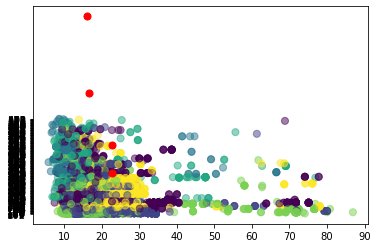

In [17]:
# Plot our data about the cars (KmPerLiter VS Hestekræfter) and the centroids we have found for the clusters
plt.scatter(dataset['Km/l'], dataset['Hestekræfter'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

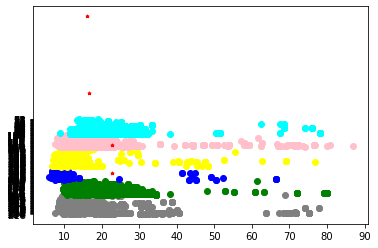

In [19]:
prediction = kmeans.predict(features)
dataset['cluster'] = prediction
cluster_one = dataset[dataset['cluster'] == 0][['Km/l','Hestekræfter']]
cluster_two = dataset[dataset['cluster'] == 1][['Km/l','Hestekræfter']]
cluster_three = dataset[dataset['cluster'] == 2][['Km/l','Hestekræfter']]
cluster_four = dataset[dataset['cluster'] == 3][['Km/l','Hestekræfter']]
cluster_five = dataset[dataset['cluster'] == 4][['Km/l','Hestekræfter']]
cluster_six = dataset[dataset['cluster'] == 5][['Km/l','Hestekræfter']]

plt.scatter(cluster_one['Km/l'], cluster_one['Hestekræfter'], c="grey")
plt.scatter(cluster_two['Km/l'], cluster_two['Hestekræfter'], c="green")
plt.scatter(cluster_three['Km/l'], cluster_three['Hestekræfter'], c="blue")
plt.scatter(cluster_four['Km/l'], cluster_four['Hestekræfter'], c="yellow")
plt.scatter(cluster_five['Km/l'], cluster_five['Hestekræfter'], c="pink")
plt.scatter(cluster_six['Km/l'], cluster_six['Hestekræfter'], c="cyan")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=10, marker='*')

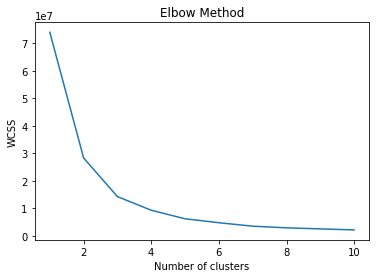

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

array([1, 4, 1, ..., 1, 0, 1])

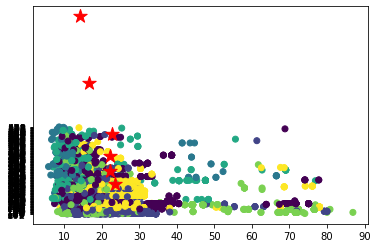

In [23]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(features)
display(pred_y)
plt.scatter(features['Km/l'], features['Hestekræfter'], c=kmeans.labels_.astype('float'))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*')